In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

Firstly, let's understand the dataset well. From the Kaggle description of the dataset:
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()
# there are no missing or NaN values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# from the statistical description of the dataset, we can see that the dataset is heavily unbalanced and underrepresents the 'Fraud' label
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


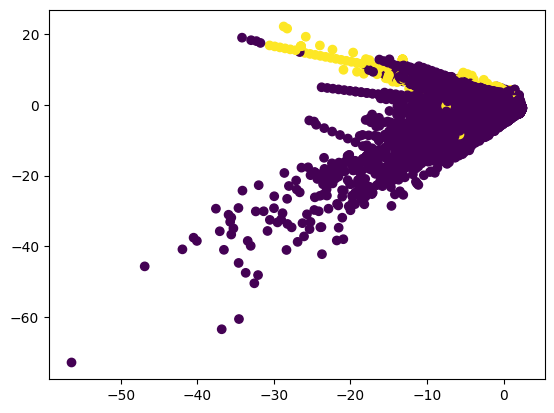

In [5]:
# visualizing our dataset helps us get an idea for whether a linear or a non-linear classifier would be more appropriate
plt.scatter(df['V1'], df['V2'], c=df['Class'])

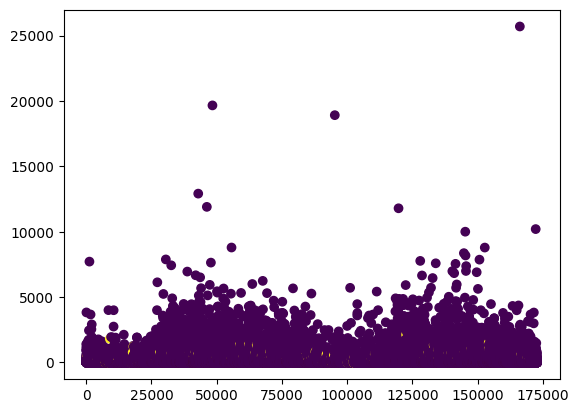

In [6]:
plt.scatter(df['Time'], df['Amount'], c=df['Class'])

<Axes: >

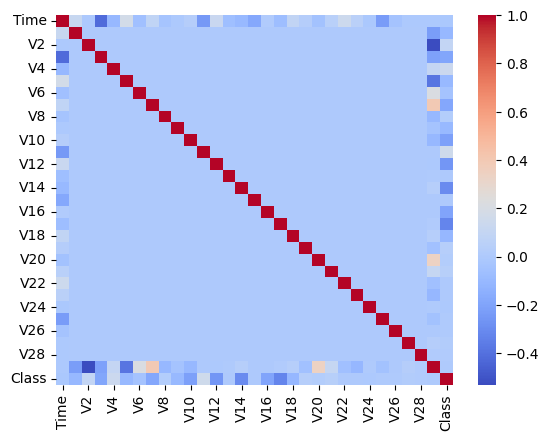

In [7]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

In [8]:
# Clearly, a non-linear classifier such as a RF would be better suited
# Divide our dataset into X and y, following which we split the data into a training and a test set
X = df.drop('Class', axis=1)
X = X.values
y = df['Class']
y = y.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=True)

In [10]:
# Let's try a boosting algorithm like AdaBoost to make our training robust.
from sklearn.ensemble import AdaBoostClassifier

ADBclf = AdaBoostClassifier(n_estimators=20)
ADBclf.fit(X_train, y_train)
ADBclf.score(X_train, y_train)

C:\Users\sride\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9992056002984485

In [11]:
y_pred = ADBclf.predict(X_test)

In [12]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8315095523296544


You'll observe that the model's training score is very high but it's not great at generalization. Adaboost has a couple of disadvantages including not subsampling the training set and being more sensitive to noise and outliers. Let's try a more robust and powerful boosting algorithm, namely, LightGBM.

In [13]:
! pip install lightgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='binary',  num_leaves=10, max_depth=10)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


In [14]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8462353427583751


This performs better than the previous model. Now, let's use a standard RF Classifier from the sklearn library that employs bagging and demonstrate why the usual accuracy, precision, recall scores, etc. do not provide an accurate judgement for the model's performance in this case.

In [15]:
# Fit the model to the training set and make it predict labels for the test dataset features
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, criterion='entropy').fit(X_train, y_train)

In [16]:
y_pred = model.predict(X_test)

In [17]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56864\n           1       0.93      0.72      0.82        98\n\n    accuracy                           1.00     56962\n   macro avg       0.97      0.86      0.91     56962\nweighted avg       1.00      1.00      1.00     56962\n'

In [18]:
accuracy_score(y_test, y_pred)

0.9994382219725431

In [19]:
precision_score(y_test, y_pred)

0.9342105263157895

In [20]:
recall_score(y_test, y_pred)

0.7244897959183674

In [21]:
cm = confusion_matrix(y_test, y_pred)

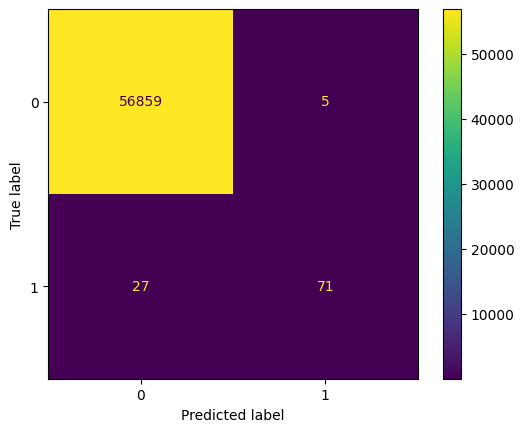

In [22]:
ConfusionMatrixDisplay(cm).plot()

As you can see from the confusion matrix, the recall score is low because of higher false negatives, and because overall, the number of class '0' samples in the dataset is less in proportion to the class '1' samples. So even if the accuracy is very high ~99%, that does not necessarily indicate that the model is performing exceptionally.
As I mentioned before, the dataset is very unbalanced and thus, the confusion matrix here doesn't provide a good idea of the model's performance

In [23]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8622009334121944


A value closer to 1 indicates a skilful model i.e. "a model that assigns a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average." - Source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
We can do better than the present AUC score, so let's use GridSearchCV to brute force the most optimal hyper-parameters for fine-tuning the model.
You can give more options and add more hyperparameters to the params dict, but I'm keeping it short just for a demonstration.

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
params = {
    'n_estimators': [20, 50],
    'max_features': ['sqrt', 'log2']
}
grid = GridSearchCV(model, params, cv=2, verbose=3).fit(X_train, y_train)

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

The model's performance is not exceptional but it isn't bad either. You can do a couple of things to improve this, use the RandomizedSearchCV function as well, that randomly selects combinations of hyperparameters to fine-tune the model. You can also add more hyperparameters for tuning to the params dict, and explore what all you can tune in the documentation of the RF Classifier on the sklearn doc website.